In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv(r'C:\my_folder\assignment_question\Desktop\Customer Churn Project - Python\customer_churn.csv')
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [7]:
data.shape

(7043, 21)

In [8]:
data.duplicated().sum()

0

In [9]:
print("\nSummary of the dataset:")
print('==============================')
print(data.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

In [10]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [11]:
print("\nSummary of the dataset:")
print('==============================')
print(data.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

In [12]:
print("\nStatistical summary of the dataset:")
print("==========================================")
print(data.describe())


Statistical summary of the dataset:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [13]:
print("\nMissing values in the dataset:")
print("==========================================")
print(data.isnull().sum())


Missing values in the dataset:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [14]:
data.dropna(inplace=True)
data.drop(columns='customerID',inplace=True)
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [16]:
print("\nShape of the dataset:")
print("========================")
print(data.shape)


Shape of the dataset:
(7032, 20)


In [17]:
print("\nDuplicate rows in the dataset:")    ### Not removing duplicates since different CustomerID
print("==================================")
print(data.duplicated().sum())


Duplicate rows in the dataset:
22


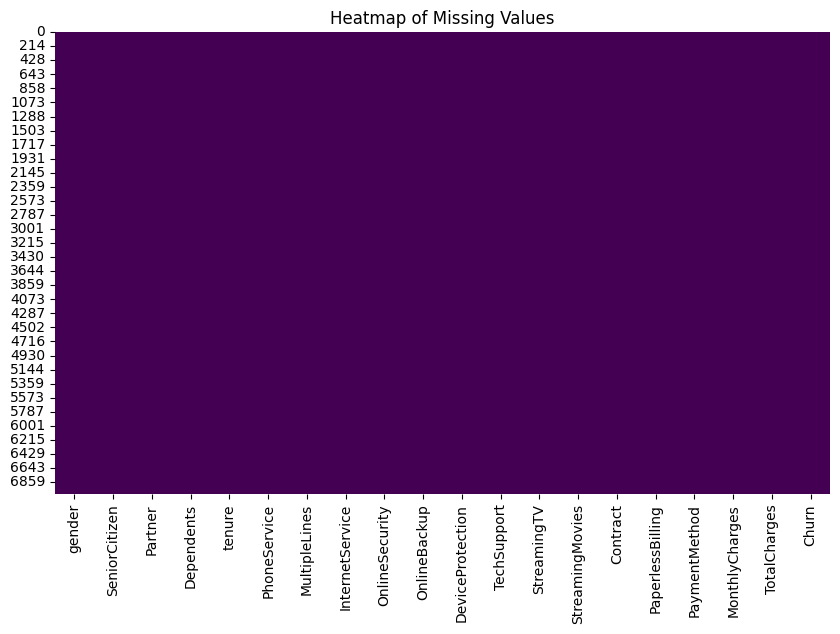

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [19]:
numcols= data.select_dtypes(include='number').columns
numcols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [20]:
catcols= data.select_dtypes(include='object').columns
catcols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

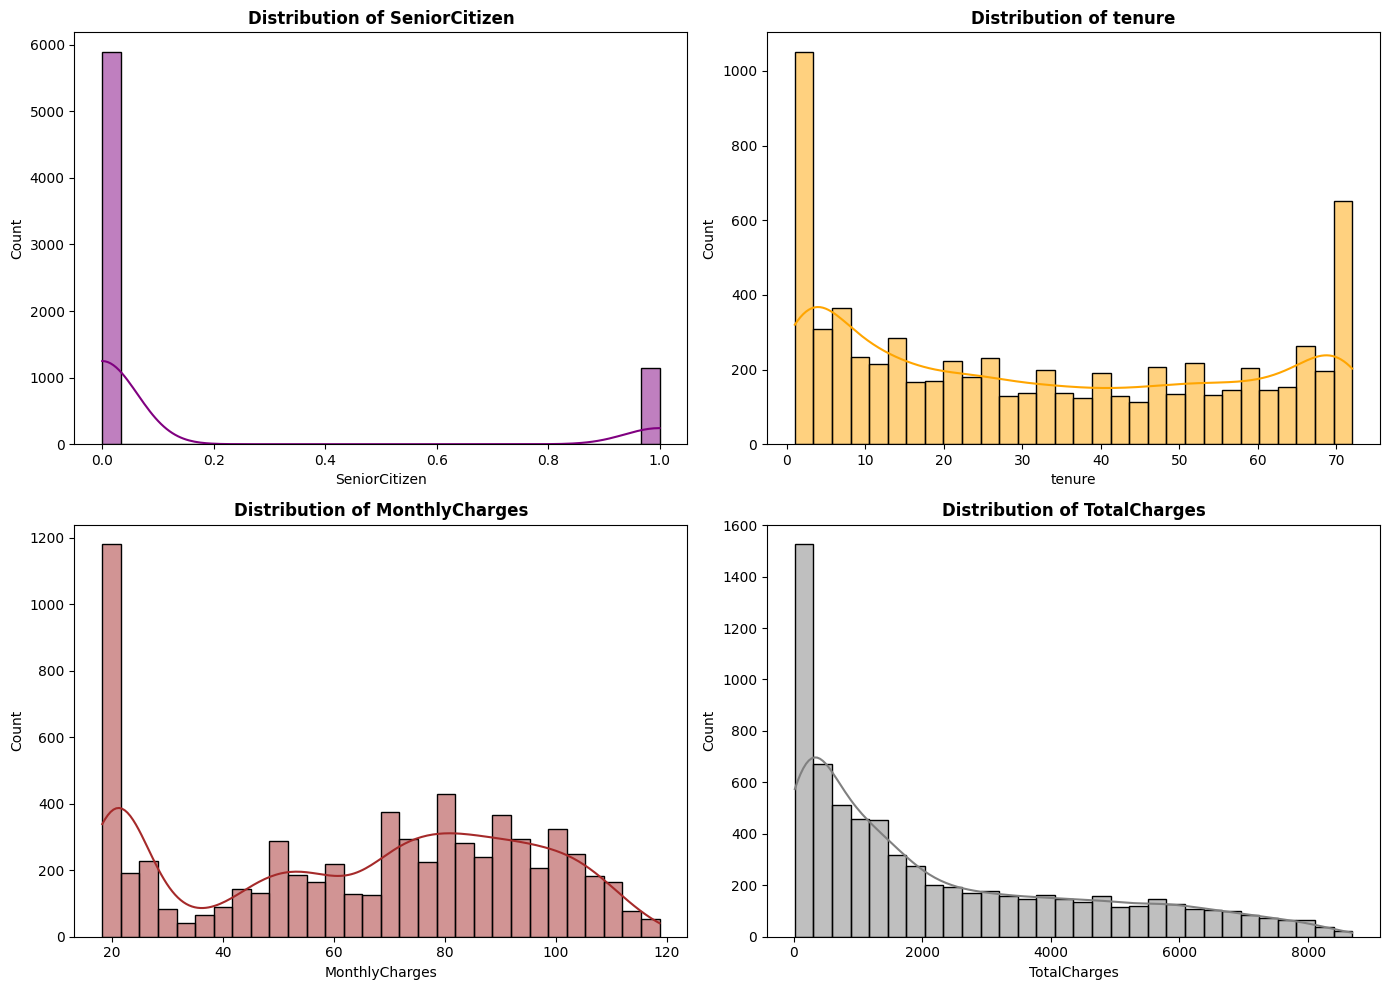

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
random.shuffle(colors)

for i, feature in enumerate(numcols):
    color = colors[i % len(colors)]
    sns.histplot(data[feature], kde=True, bins=30, ax=axes[i], color=color)
    axes[i].set_title(f'Distribution of {feature}', fontweight='bold')

plt.tight_layout()
plt.show()

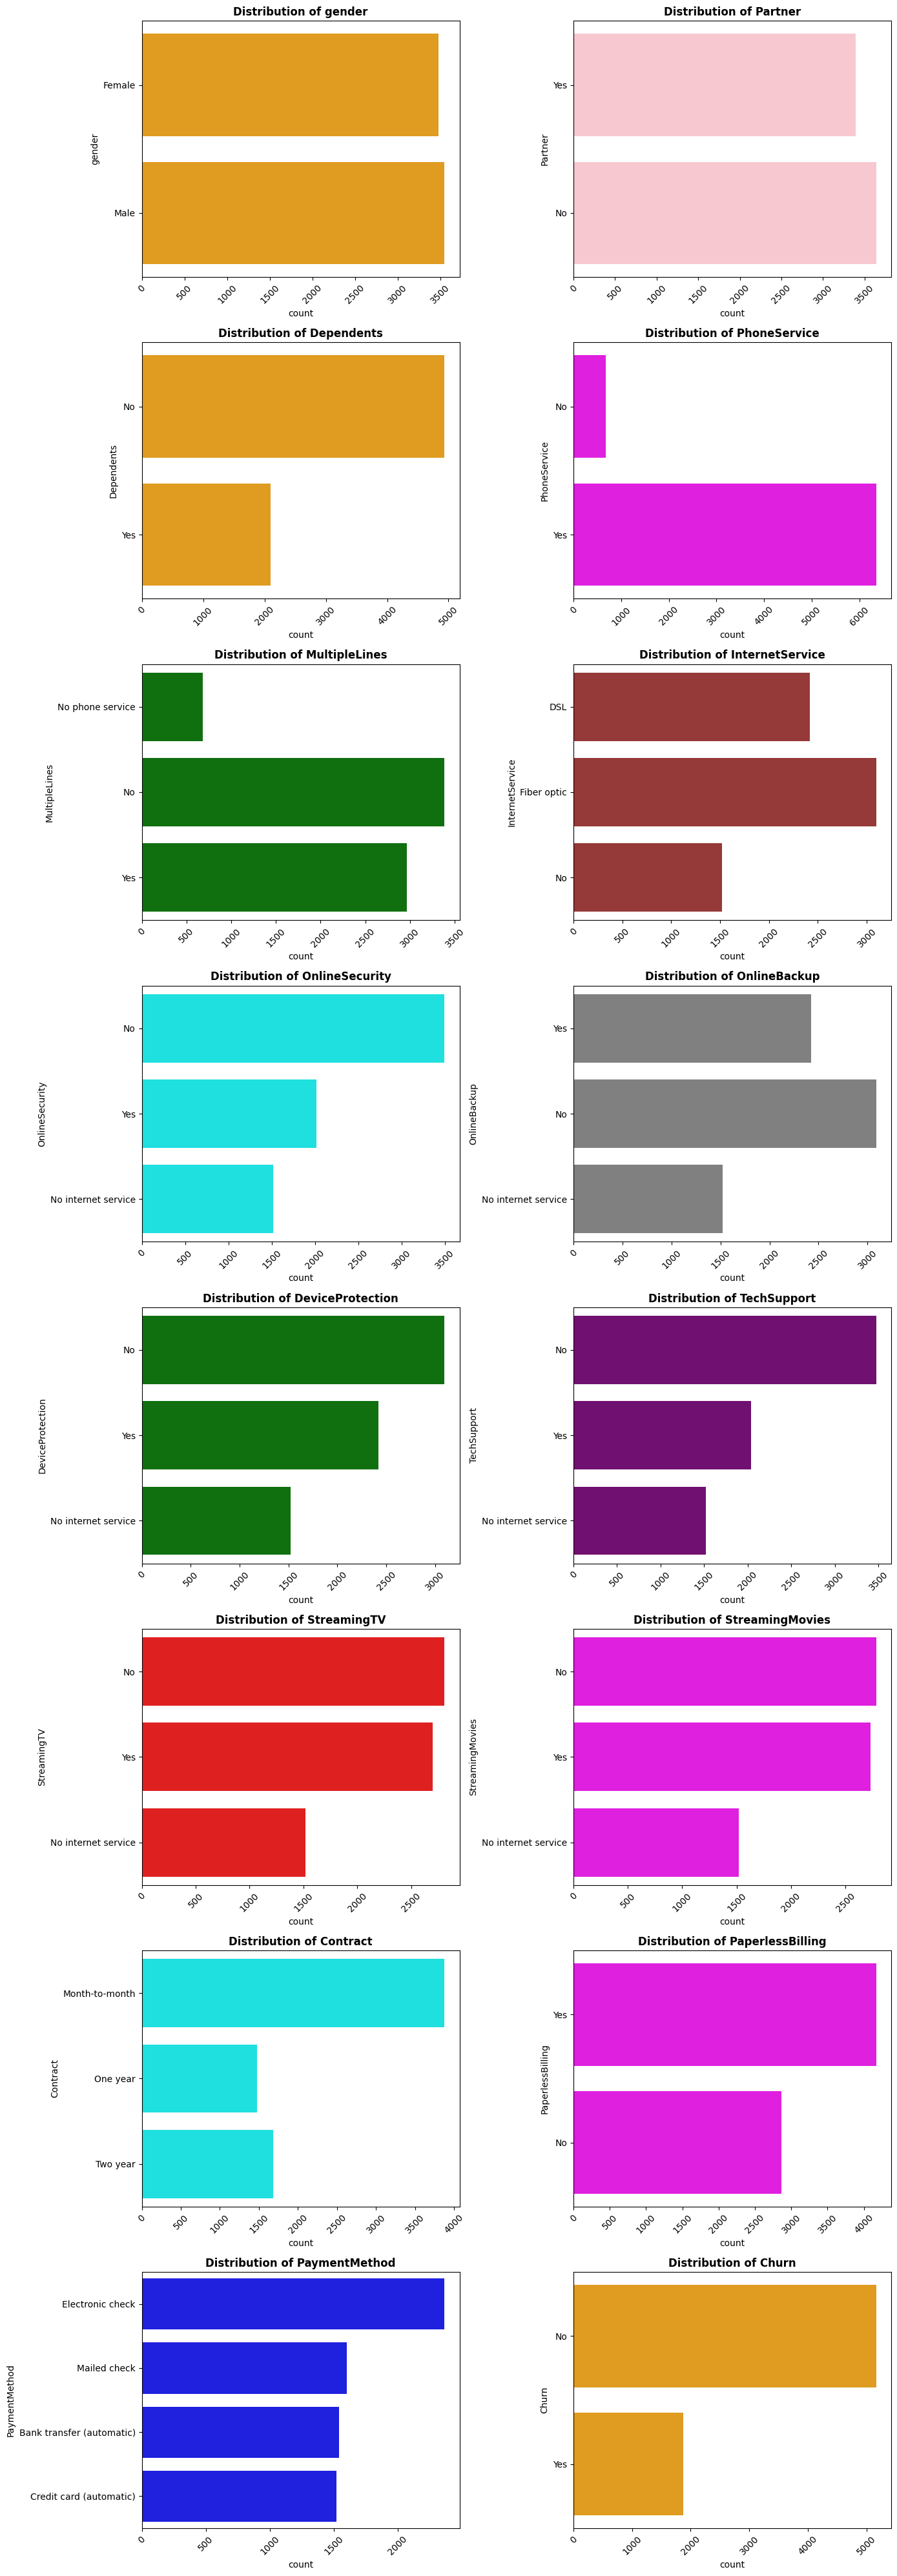

In [22]:
fig, axes = plt.subplots(8, 2, figsize=(14, 40))
axes = axes.flatten()

for i, feature in enumerate(catcols):
    color = random.choice(colors)
    sns.countplot(data[feature], ax=axes[i],color=color)
    axes[i].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

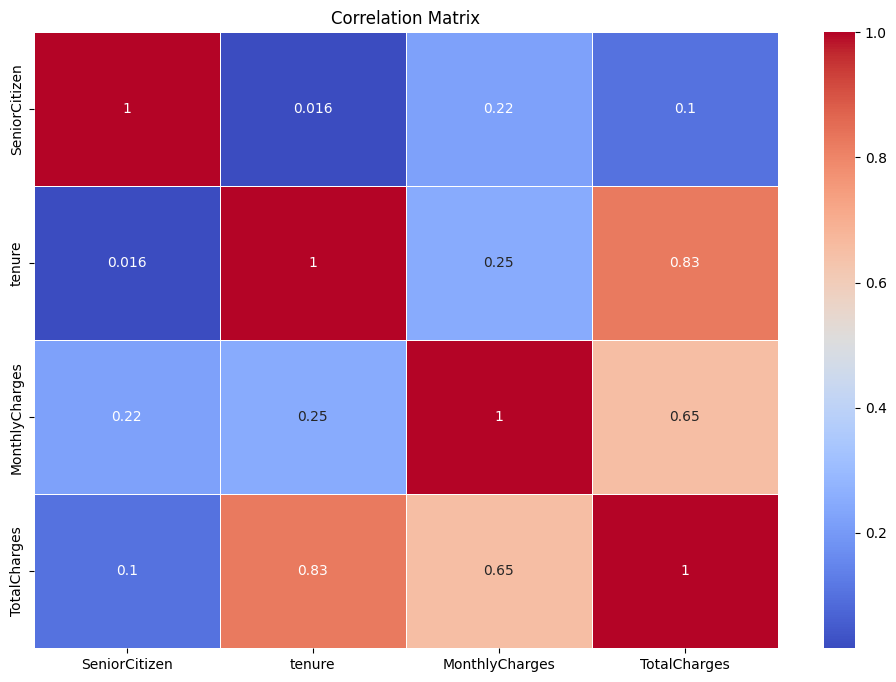

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

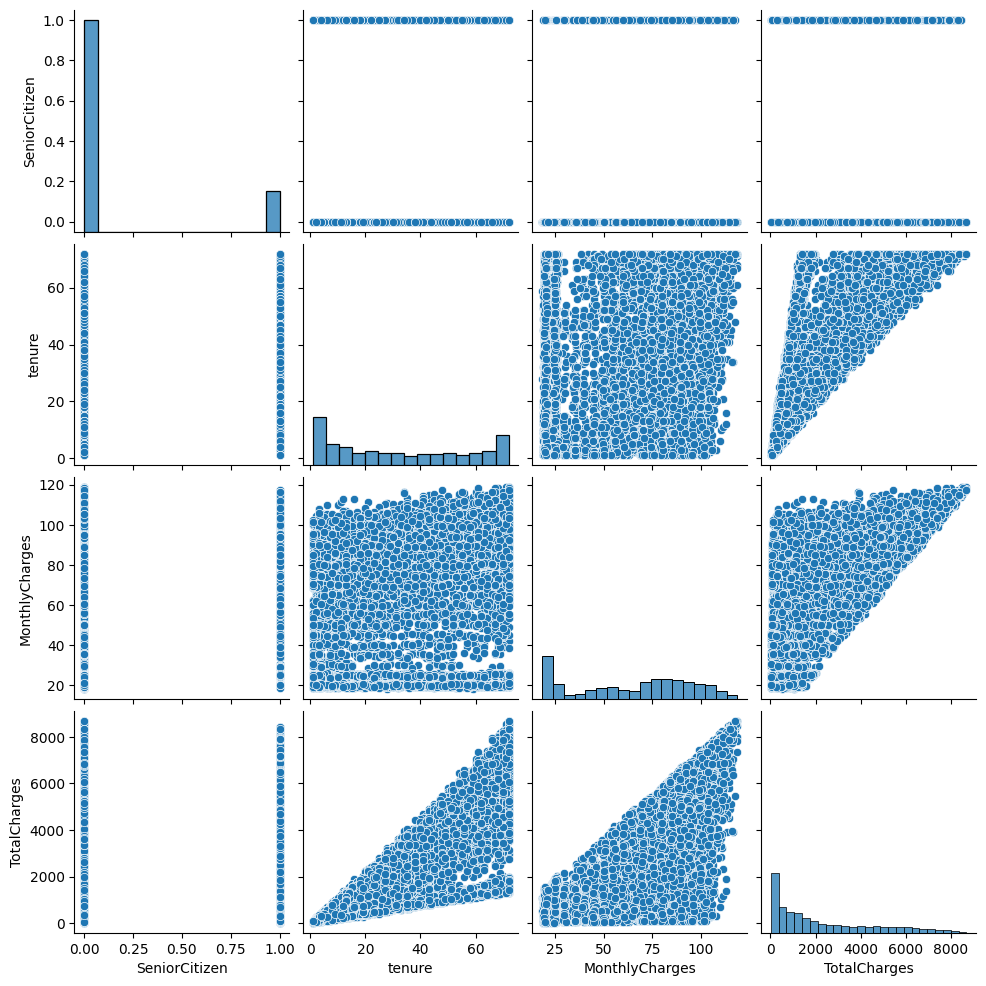

In [24]:
sns.pairplot(data[numcols])
plt.show()

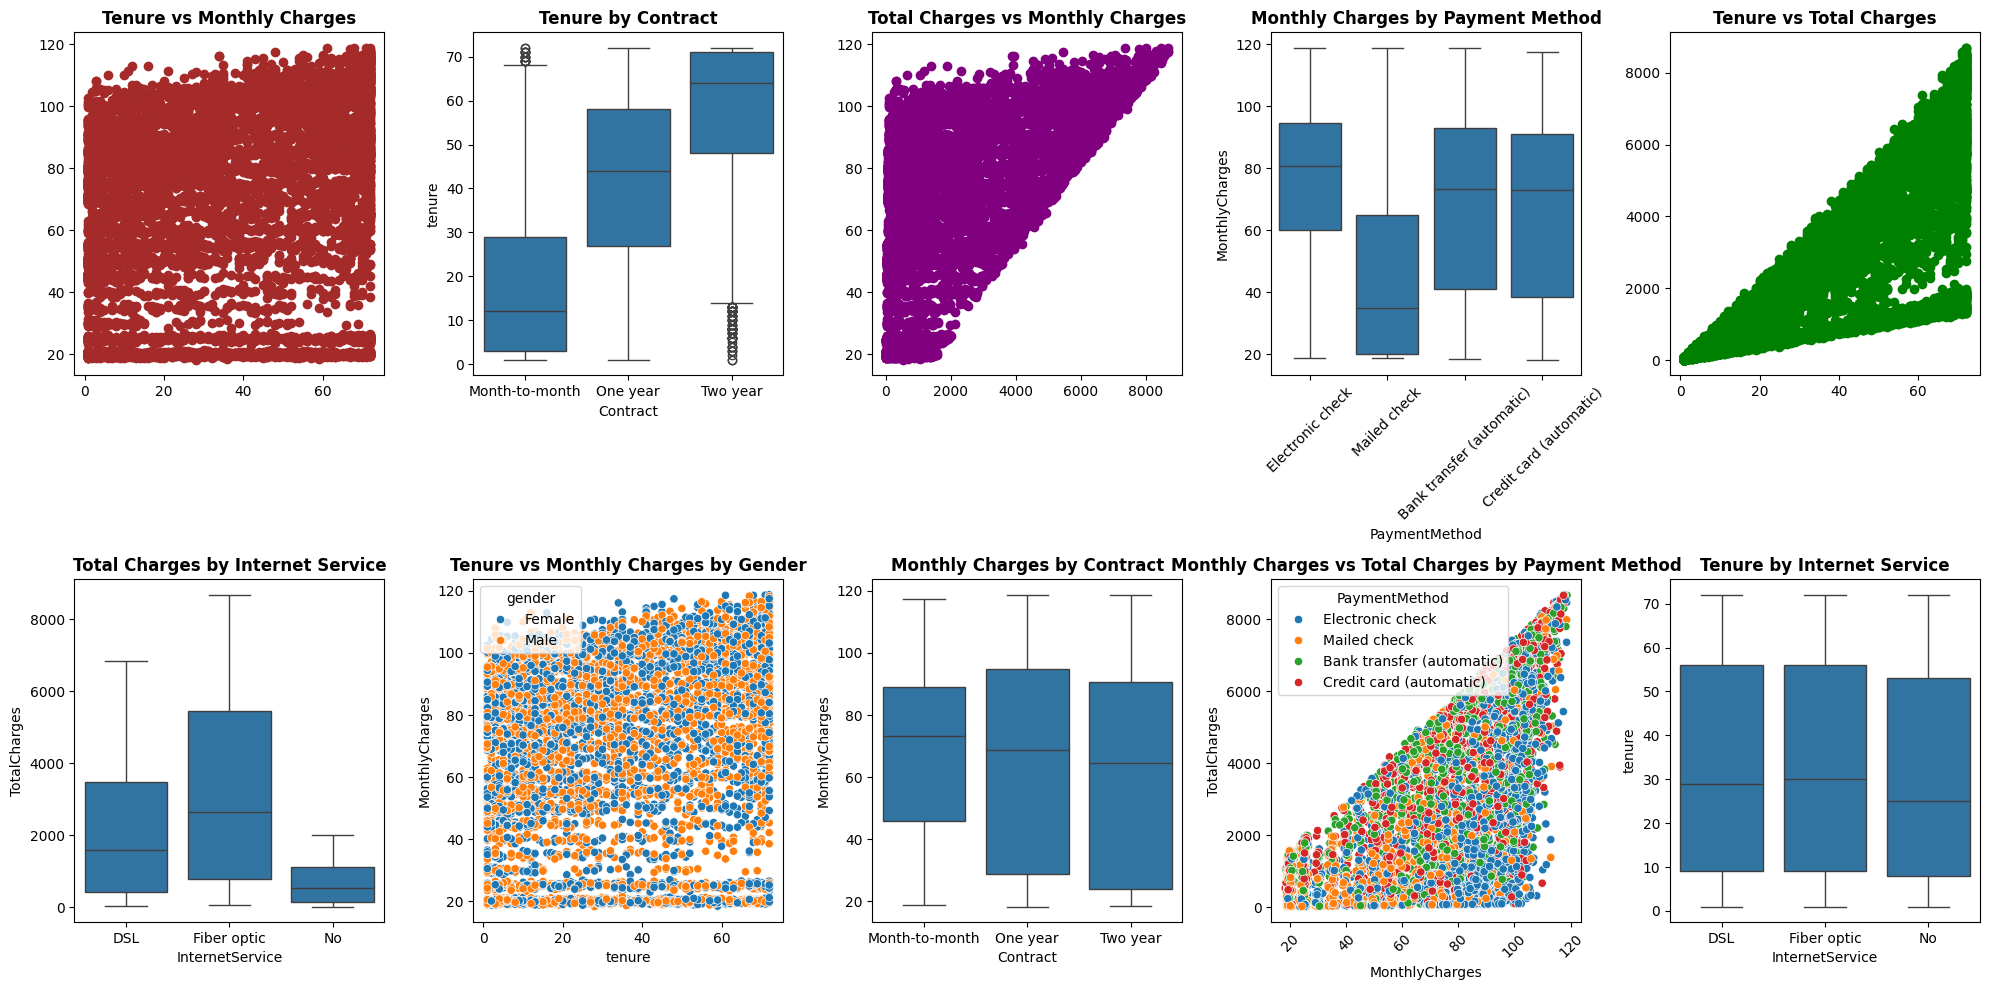

In [25]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 5, 1)
plt.scatter(x=data['tenure'], y=data['MonthlyCharges'], color='brown')
plt.title('Tenure vs Monthly Charges',fontweight='bold')

plt.subplot(2, 5, 2)
sns.boxplot(y=data['tenure'], x=data['Contract'])
plt.title('Tenure by Contract',fontweight='bold')

plt.subplot(2, 5, 3)
plt.scatter(x=data['TotalCharges'], y=data['MonthlyCharges'], color='purple')
plt.title('Total Charges vs Monthly Charges',fontweight='bold')

plt.subplot(2, 5, 4)
sns.boxplot(y=data['MonthlyCharges'], x=data['PaymentMethod'])
plt.title('Monthly Charges by Payment Method',fontweight='bold')
plt.xticks(rotation=45)

plt.subplot(2, 5, 5)
plt.scatter(x=data['tenure'], y=data['TotalCharges'], color='green')
plt.title('Tenure vs Total Charges',fontweight='bold')

plt.subplot(2, 5, 6)
sns.boxplot(y=data['TotalCharges'], x=data['InternetService'])
plt.title('Total Charges by Internet Service',fontweight='bold')

plt.subplot(2, 5, 7)
sns.scatterplot(x=data['tenure'], y=data['MonthlyCharges'], hue=data['gender'])
plt.title('Tenure vs Monthly Charges by Gender',fontweight='bold')

plt.subplot(2, 5, 8)
sns.boxplot(y=data['MonthlyCharges'], x=data['Contract'])
plt.title('Monthly Charges by Contract',fontweight='bold')

plt.subplot(2, 5, 9)
sns.scatterplot(x=data['MonthlyCharges'], y=data['TotalCharges'], hue=data['PaymentMethod'])
plt.title('Monthly Charges vs Total Charges by Payment Method',fontweight='bold')
plt.xticks(rotation=45)

plt.subplot(2, 5, 10)
sns.boxplot(y=data['tenure'], x=data['InternetService'])
plt.title('Tenure by Internet Service',fontweight='bold')

plt.tight_layout()
plt.show()

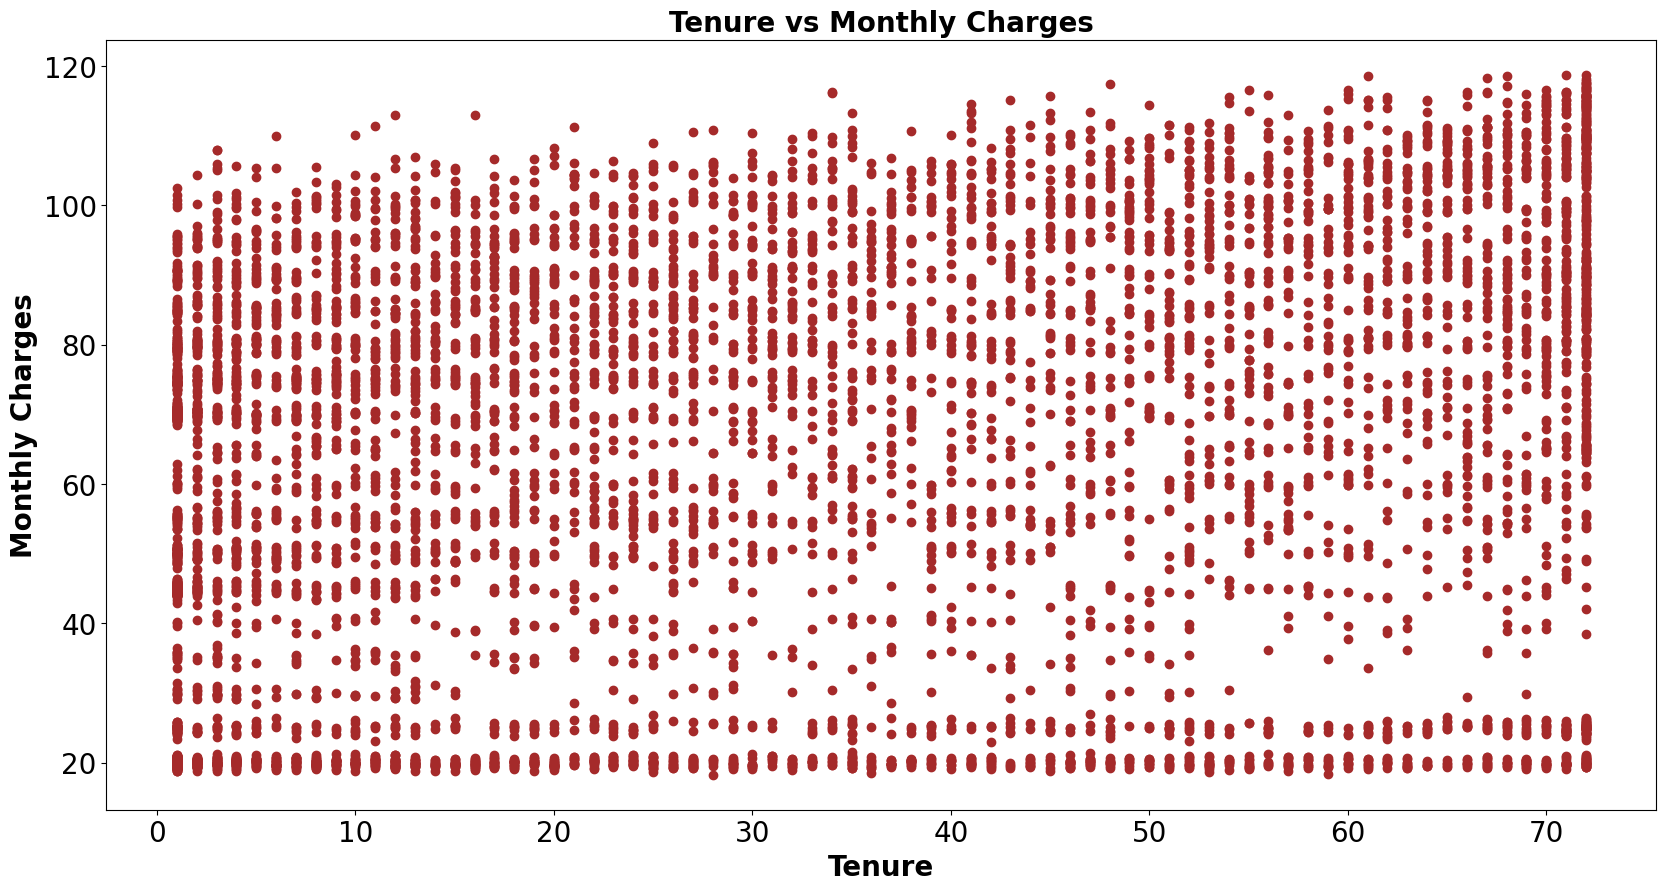

In [26]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data['tenure'], y=data['MonthlyCharges'], color='brown')
plt.title('Tenure vs Monthly Charges', fontweight='bold', fontsize=20)
plt.xlabel('Tenure', fontsize=20, fontweight='bold')
plt.ylabel('Monthly Charges', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

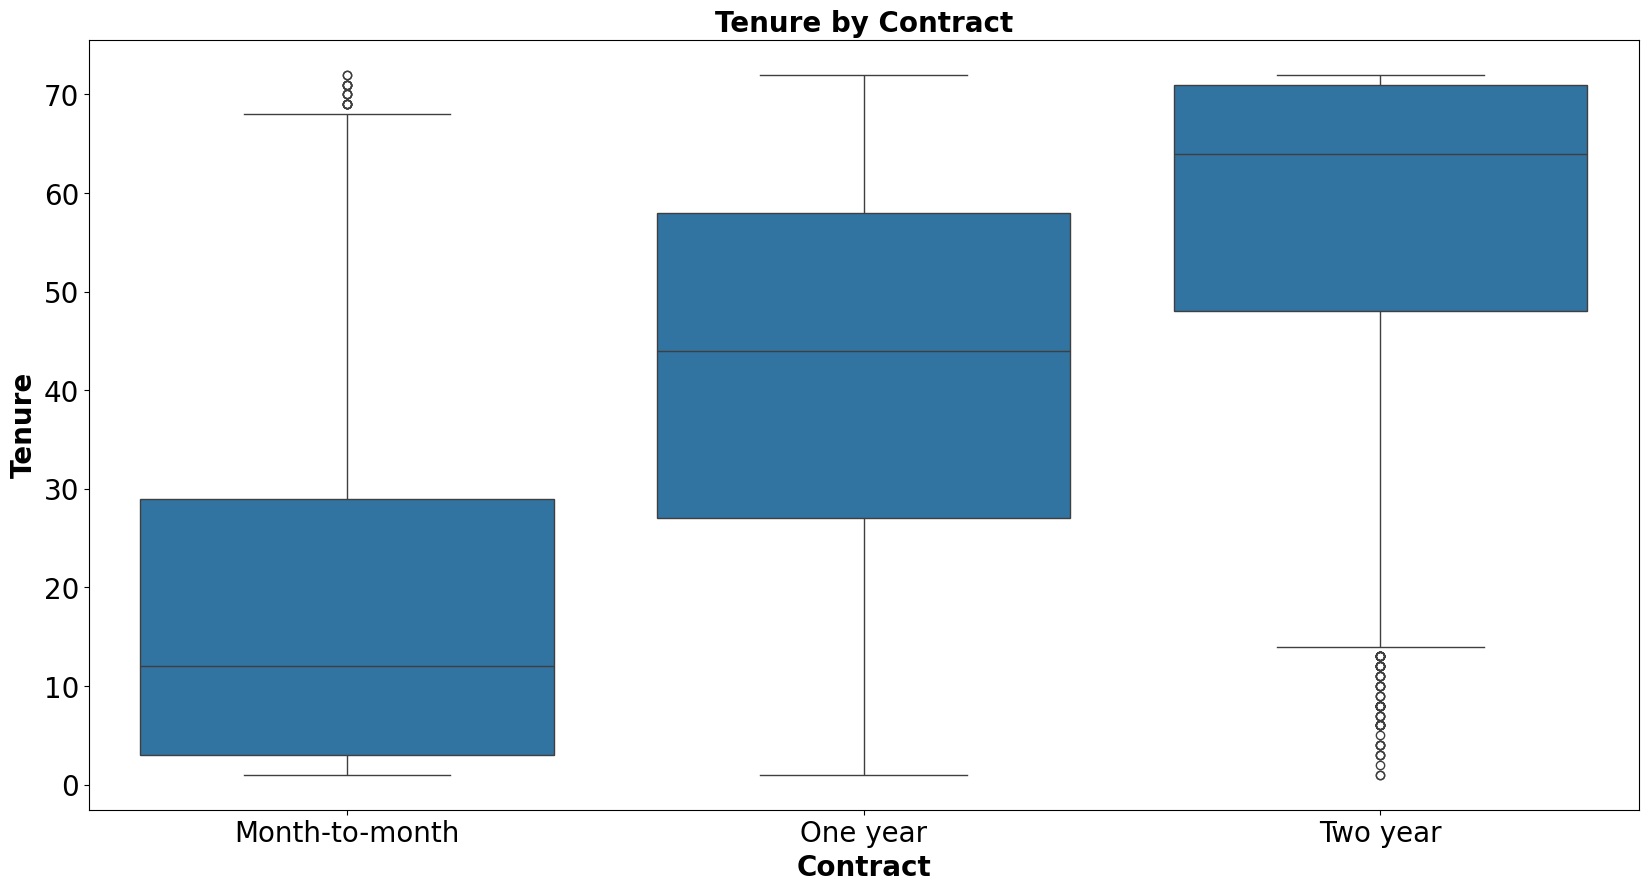

In [27]:
plt.figure(figsize=(20, 10))
sns.boxplot(y=data['tenure'], x=data['Contract'])
plt.title('Tenure by Contract', fontweight='bold', fontsize=20)
plt.xlabel('Contract', fontsize=20, fontweight='bold')
plt.ylabel('Tenure', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

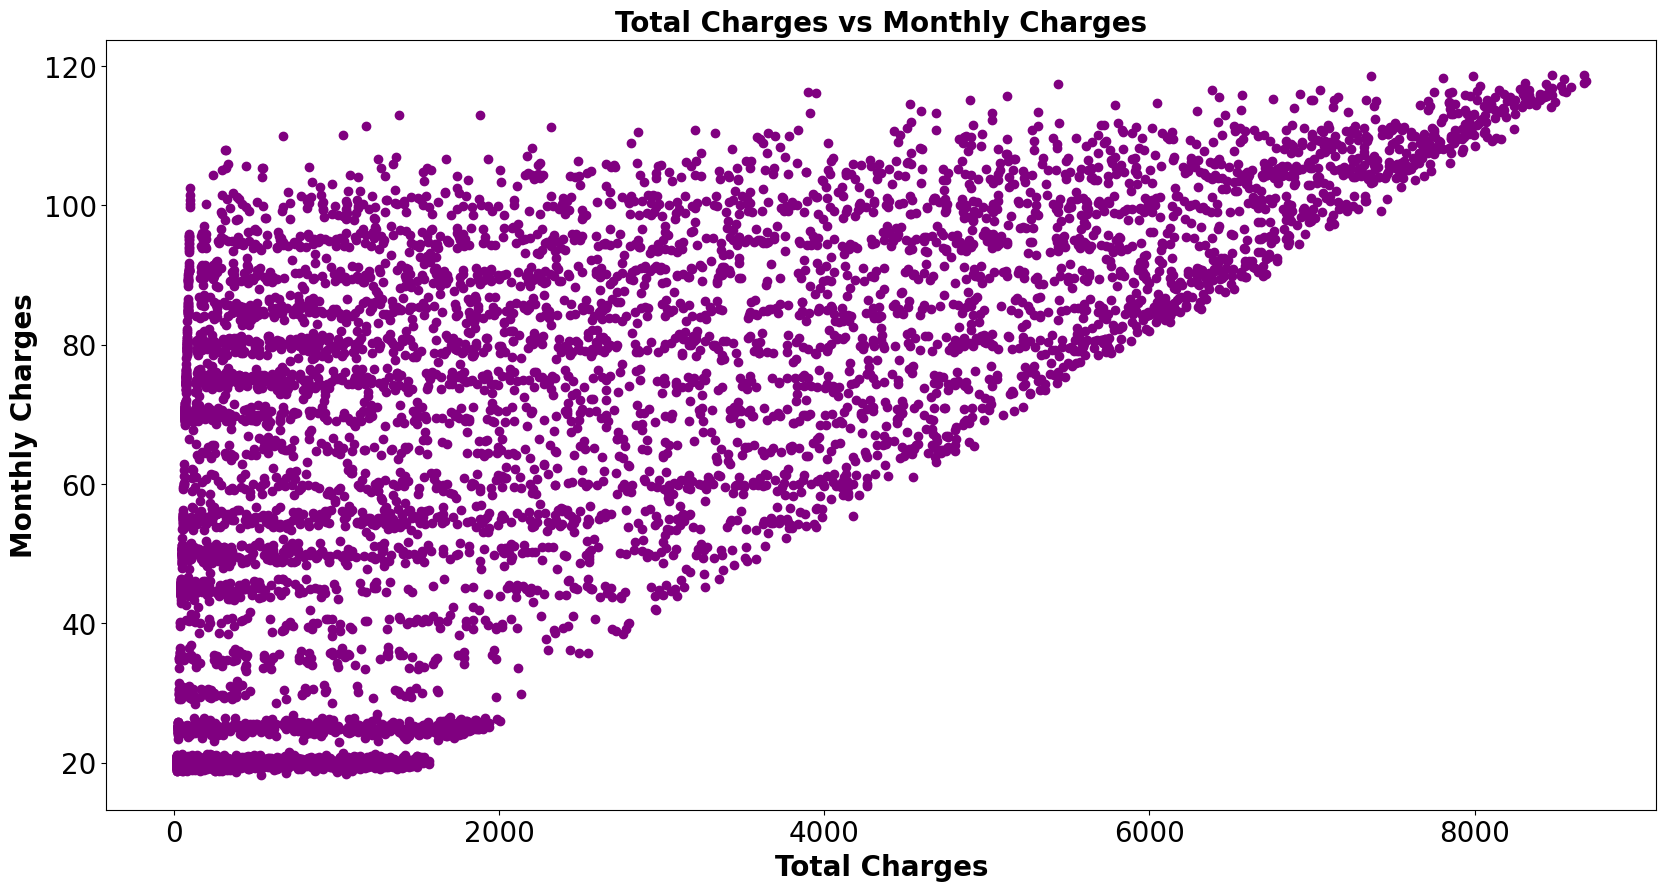

In [28]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data['TotalCharges'], y=data['MonthlyCharges'], color='purple')
plt.title('Total Charges vs Monthly Charges',fontweight='bold',fontsize = 20)
plt.xlabel('Total Charges', fontsize=20,fontweight='bold')
plt.ylabel('Monthly Charges', fontsize=20,fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

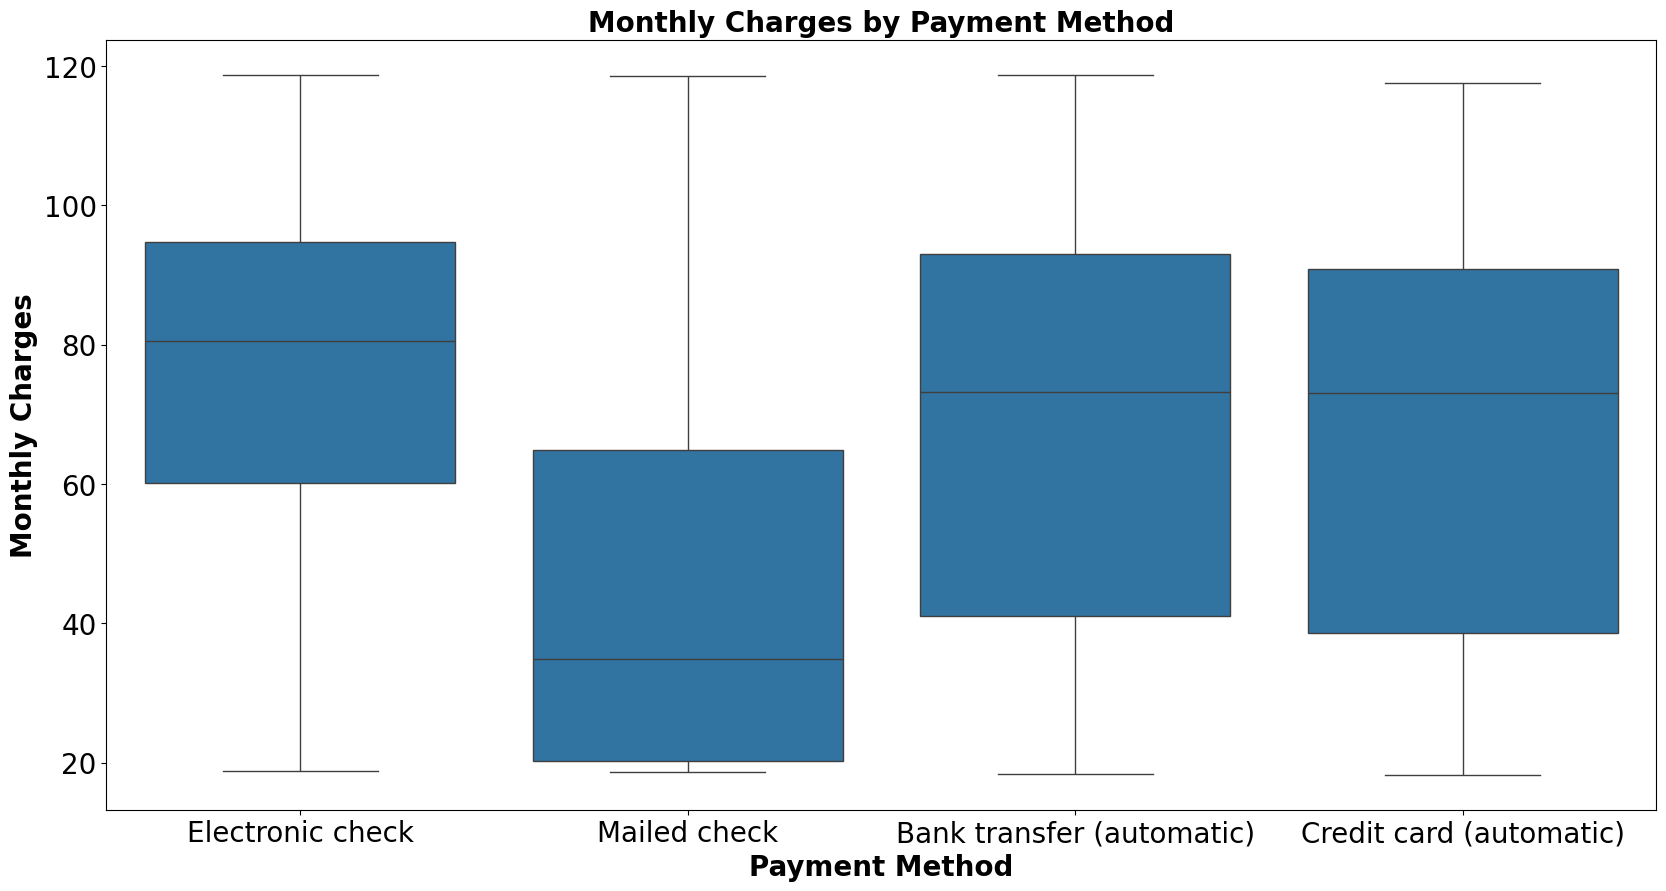

In [29]:
plt.figure(figsize=(20, 10))
sns.boxplot(y=data['MonthlyCharges'], x=data['PaymentMethod'])
plt.title('Monthly Charges by Payment Method', fontweight='bold', fontsize=20)
plt.xlabel('Payment Method', fontsize=20, fontweight='bold')
plt.ylabel('Monthly Charges', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

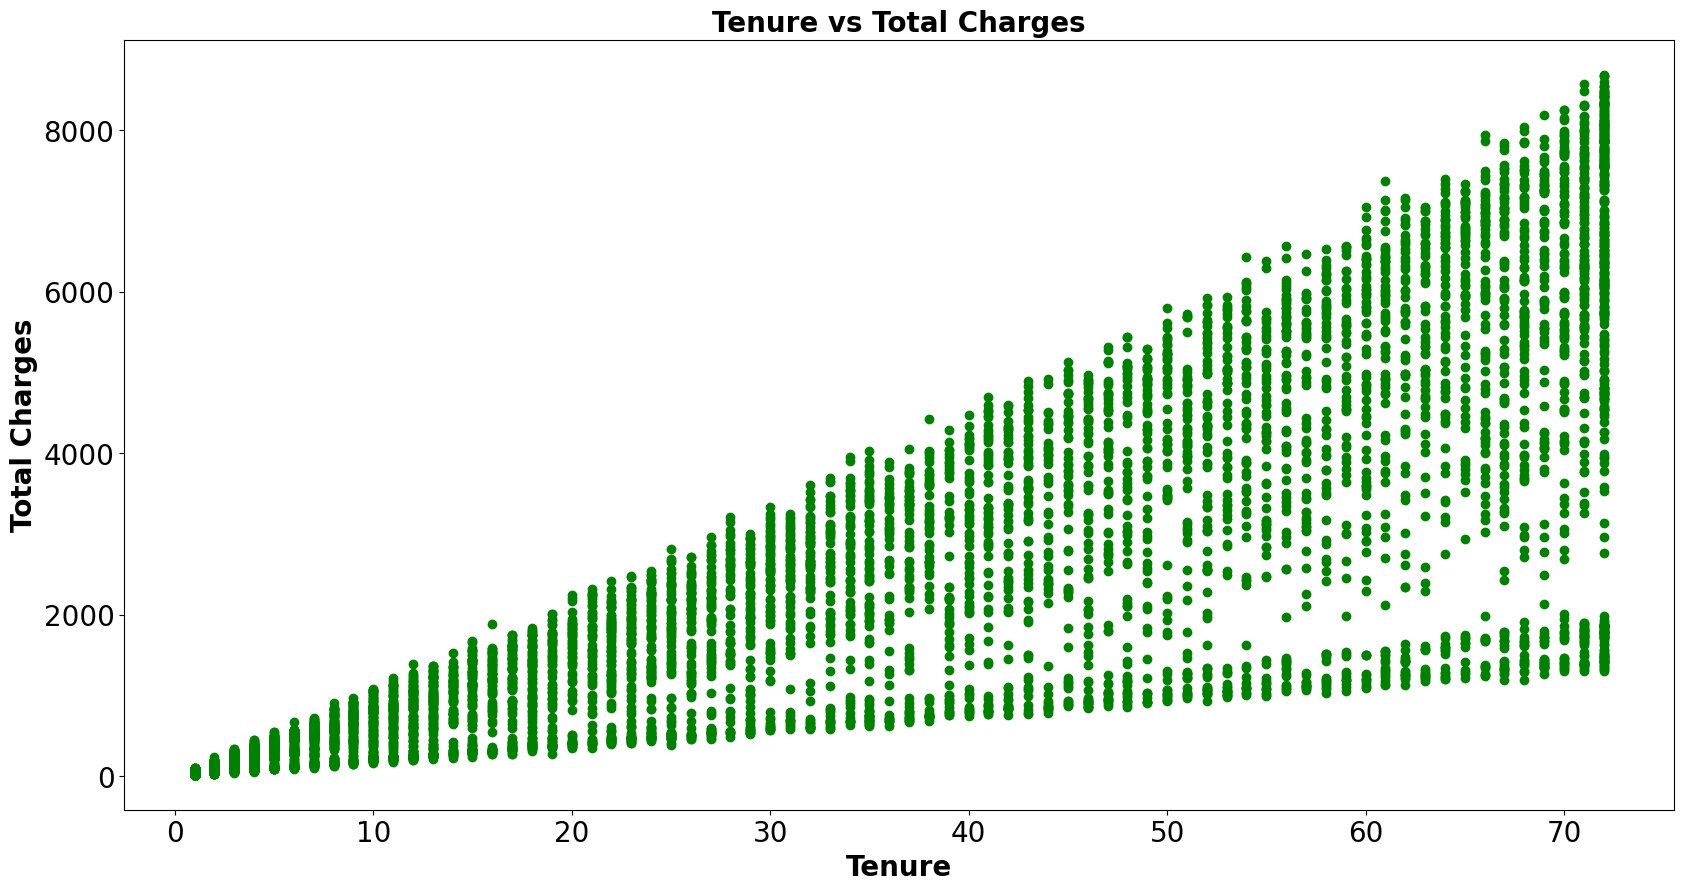

In [30]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data['tenure'], y=data['TotalCharges'], color='green')
plt.title('Tenure vs Total Charges', fontweight='bold', fontsize=20)
plt.xlabel('Tenure', fontsize=20, fontweight='bold')
plt.ylabel('Total Charges', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

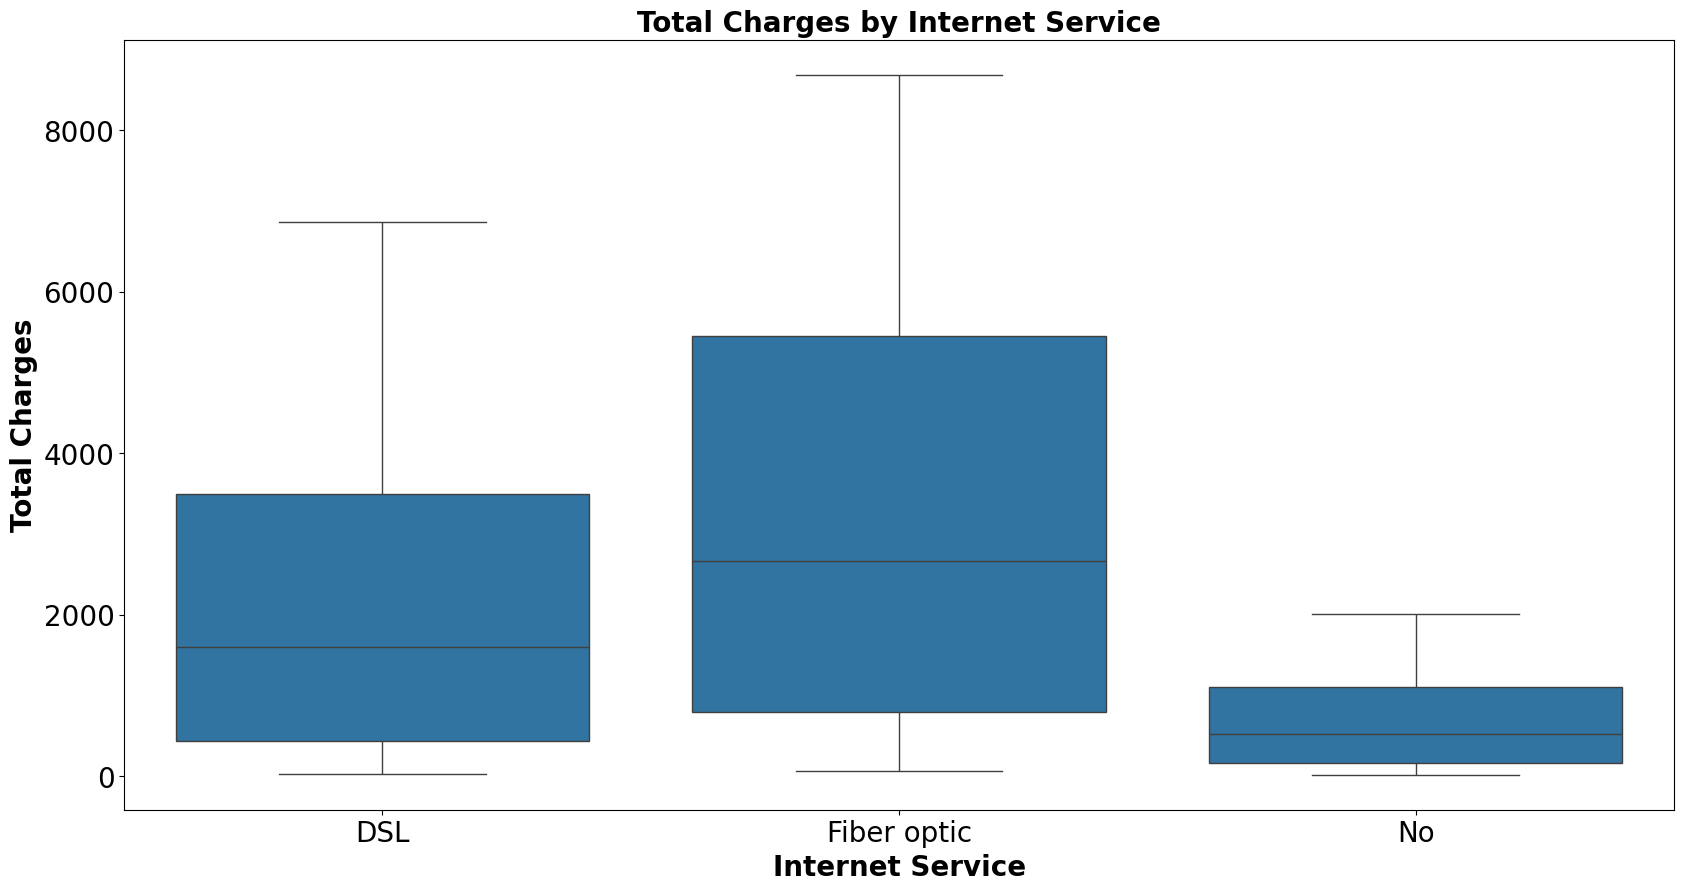

In [31]:
plt.figure(figsize=(20, 10))
sns.boxplot(y=data['TotalCharges'], x=data['InternetService'])
plt.title('Total Charges by Internet Service', fontweight='bold', fontsize=20)
plt.xlabel('Internet Service', fontsize=20, fontweight='bold')
plt.ylabel('Total Charges', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

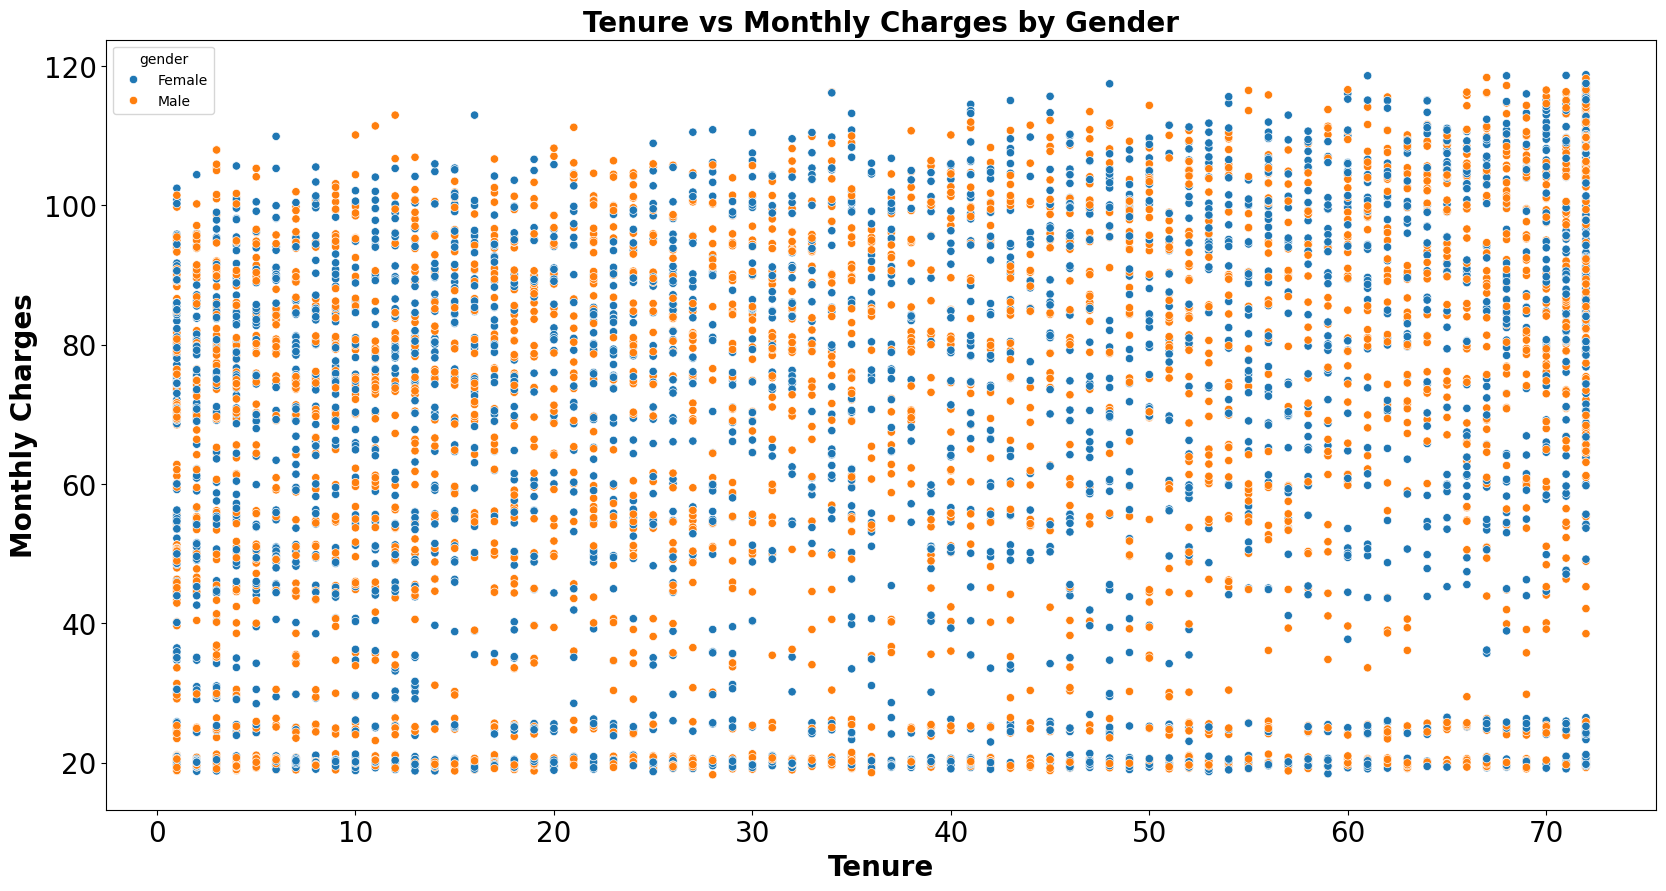

In [34]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=data['tenure'], y=data['MonthlyCharges'], hue=data['gender'])
plt.title('Tenure vs Monthly Charges by Gender', fontweight='bold', fontsize=20)
plt.xlabel('Tenure', fontsize=20, fontweight='bold')
plt.ylabel('Monthly Charges', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

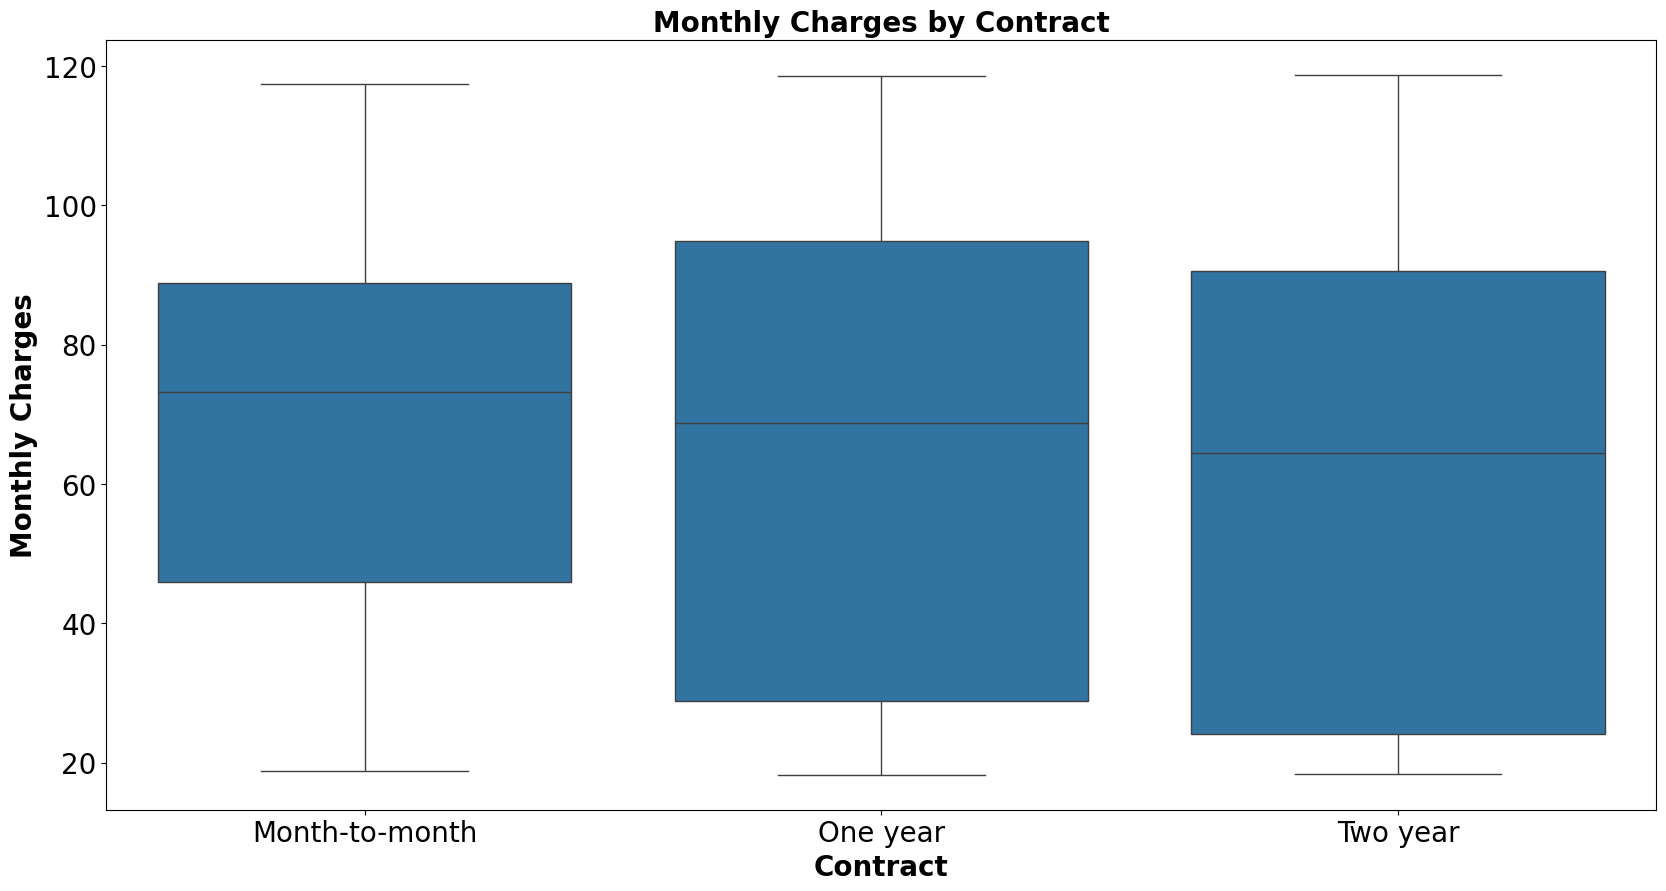

In [35]:
plt.figure(figsize=(20, 10))
sns.boxplot(y=data['MonthlyCharges'], x=data['Contract'])
plt.title('Monthly Charges by Contract', fontweight='bold', fontsize=20)
plt.xlabel('Contract', fontsize=20, fontweight='bold')
plt.ylabel('Monthly Charges', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

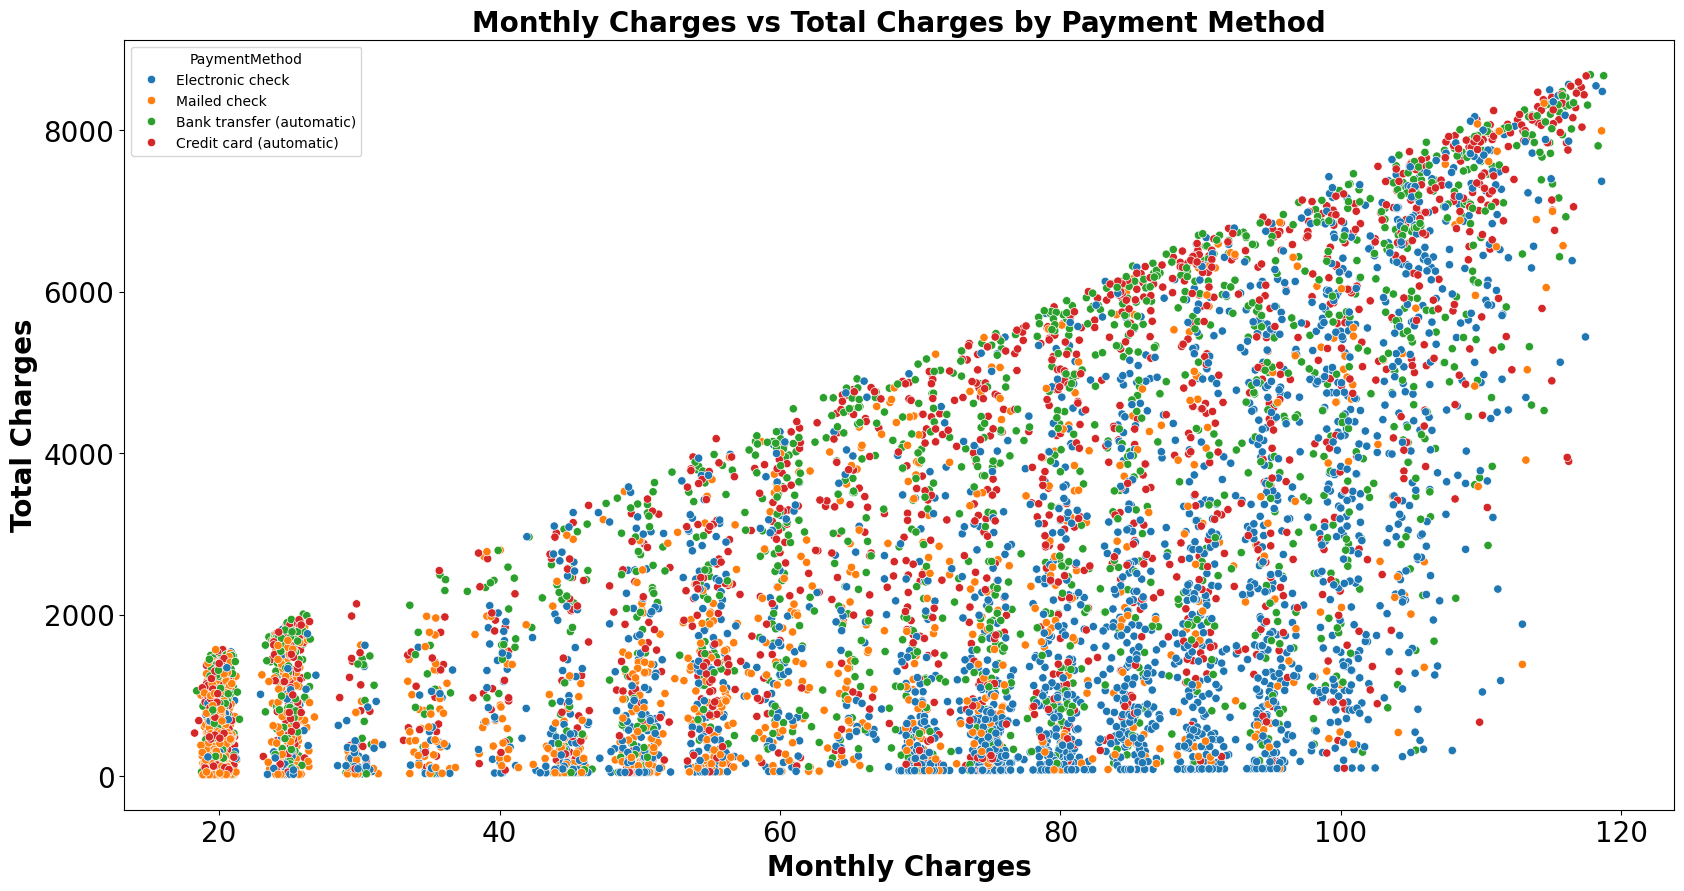

In [36]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=data['MonthlyCharges'], y=data['TotalCharges'], hue=data['PaymentMethod'])
plt.title('Monthly Charges vs Total Charges by Payment Method', fontweight='bold', fontsize=20)
plt.xlabel('Monthly Charges', fontsize=20, fontweight='bold')
plt.ylabel('Total Charges', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

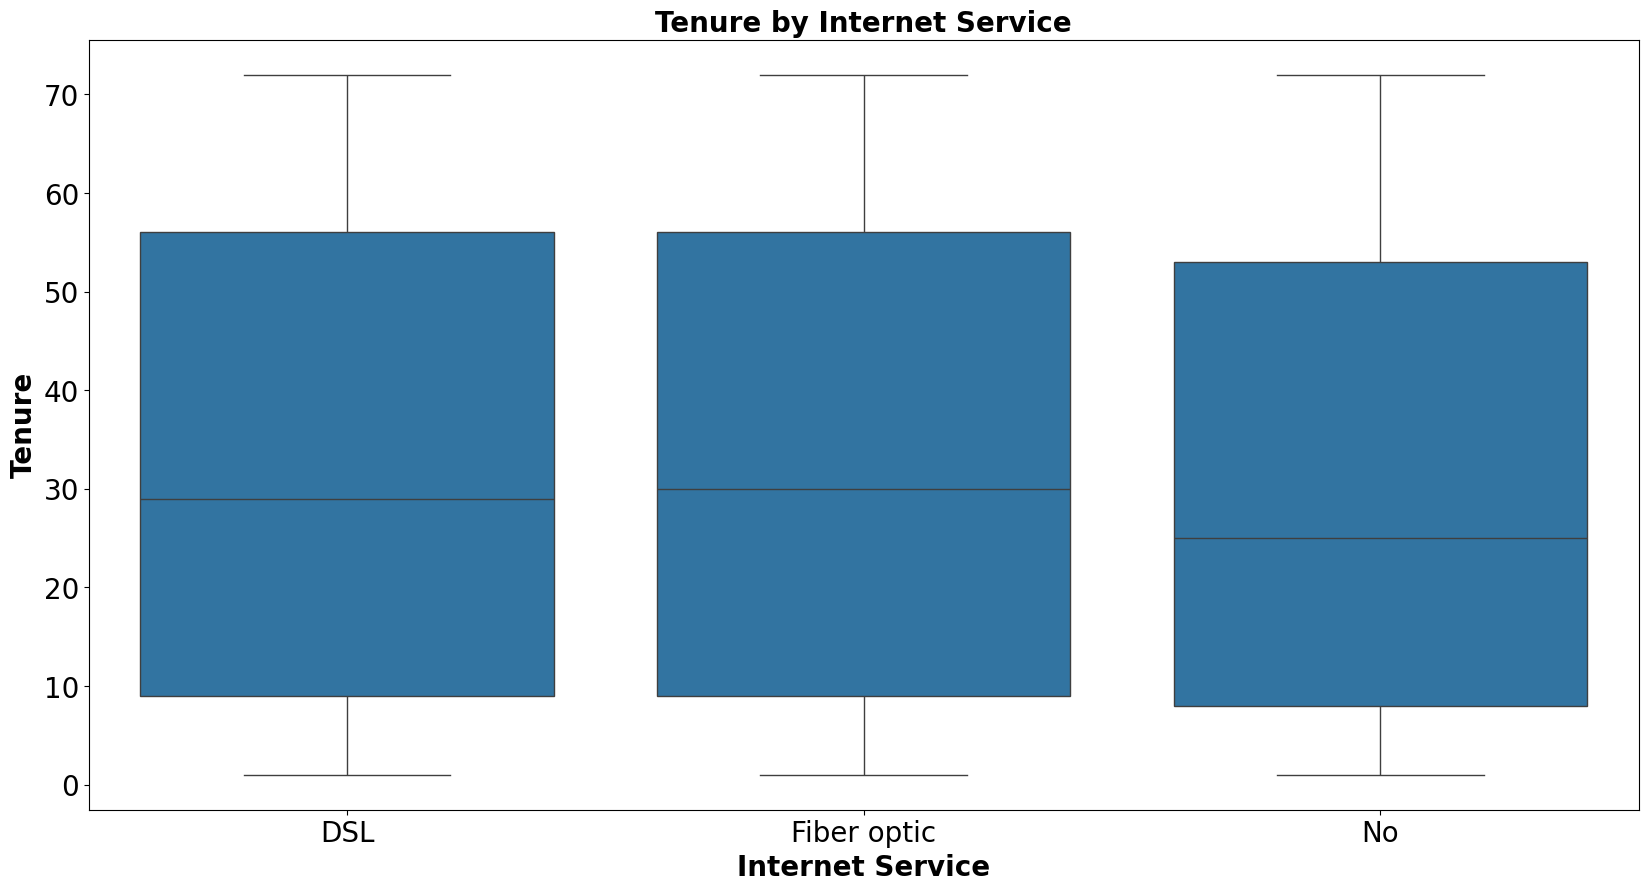

In [37]:
plt.figure(figsize=(20, 10))
sns.boxplot(y=data['tenure'], x=data['InternetService'])
plt.title('Tenure by Internet Service', fontweight='bold', fontsize=20)
plt.xlabel('Internet Service', fontsize=20, fontweight='bold')
plt.ylabel('Tenure', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

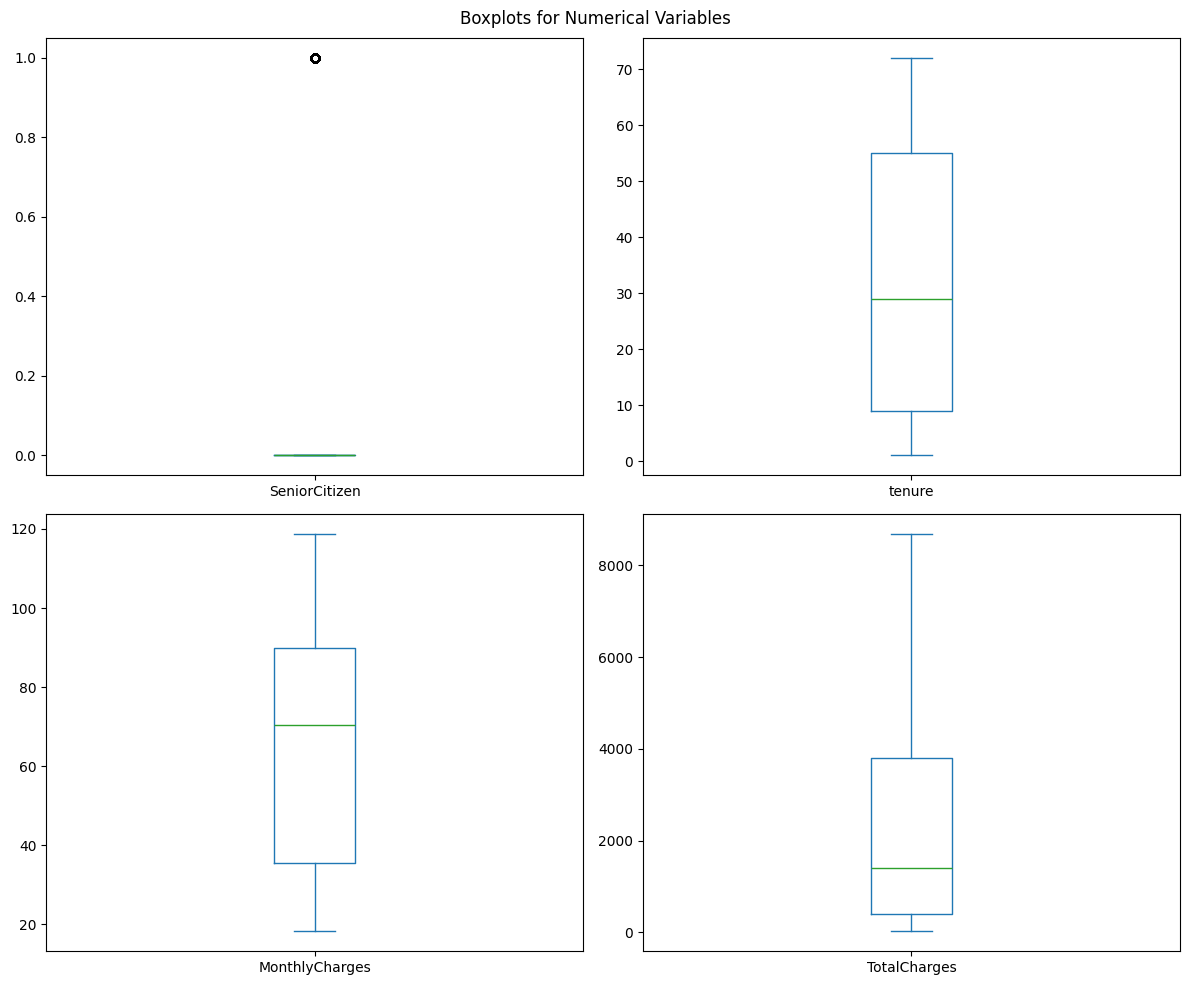

In [38]:
data[numcols].plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 10), title='Boxplots for Numerical Variables')
plt.tight_layout()
plt.show()

In [30]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
data = remove_outliers_iqr(data)

In [32]:
le=LabelEncoder()
data=data.apply(lambda x:le.fit_transform(x))

In [33]:
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       0             0   
1       1              0        0           0      33             1   
2       1              0        0           0       1             1   
3       1              0        0           0      44             0   
4       0              0        0           0       1             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2             140            71      0  
1                 0              3             481          3189      0  
2                 1              3             421           485      1  
3                 0              0             258          3141      0  
4                 1              2             707           612      1

In [34]:
X=data.drop(columns='Churn')
y=pd.DataFrame(data['Churn'])

In [35]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree (without hypertuning)': DecisionTreeClassifier(),
    'Random Forest (without hypertuning)': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [39]:
tuned_models = {
    'Decision Tree (with hypertuning)': GridSearchCV(DecisionTreeClassifier(), {'max_depth': [3, 5, 7, 10]}, cv=5, scoring='accuracy'),
    'Random Forest (with hypertuning)': GridSearchCV(RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}, cv=5, scoring='accuracy')
}
models.update(tuned_models)

In [40]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        auc_roc = roc_auc_score(y_test, y_pred)
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'AUC-ROC': auc_roc
        })
    results_df = pd.DataFrame(results)
    return results_df

In [41]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

def vif_method(X, threshold=5):
    while True:
        vif = calculate_vif(X)
        max_vif = vif['VIF'].max()
        if max_vif > threshold:
            max_vif_feature = vif.loc[vif['VIF'].idxmax(), 'Features']
            X = X.drop(columns=[max_vif_feature])
        else:
            break
    return X

X_vif = vif_method(pd.DataFrame(X_train, columns=X.columns))
X_test_vif = X_test[:, X_vif.columns.get_indexer(X_vif.columns)]

results_vif = evaluate_models(X_vif, X_test_vif, y_train, y_test, models)
print("\nResults using VIF Method:")
print('=================================')
results_vif


Results using VIF Method:


Model  Accuracy  Precision    Recall  \
0                  Logistic Regression  0.799333   0.782199  0.830000   
1  Decision Tree (without hypertuning)  0.792663   0.791160  0.795556   
2  Random Forest (without hypertuning)  0.861034   0.862723  0.858889   
3                          Naive Bayes  0.792663   0.780021  0.815556   
4                                  KNN  0.804336   0.773453  0.861111   
5                              XGBoost  0.866593   0.867483  0.865556   
6     Decision Tree (with hypertuning)  0.813785   0.800852  0.835556   
7     Random Forest (with hypertuning)  0.860478   0.860957  0.860000   

    AUC-ROC  
0  0.799316  
1  0.792661  
2  0.861035  
3  0.792650  
4  0.804304  
5  0.866593  
6  0.813773  
7  0.860478

In [42]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

results_pca = evaluate_models(X_train_pca, X_test_pca, y_train, y_test, models)
print("\nResults using PCA Method:")
print('=================================')
results_pca


Results using PCA Method:


Model  Accuracy  Precision    Recall  \
0                  Logistic Regression  0.792107   0.787118  0.801111   
1  Decision Tree (without hypertuning)  0.741523   0.728227  0.771111   
2  Random Forest (without hypertuning)  0.788772   0.777186  0.810000   
3                          Naive Bayes  0.782101   0.767368  0.810000   
4                                  KNN  0.768760   0.760776  0.784444   
5                              XGBoost  0.796554   0.785256  0.816667   
6     Decision Tree (with hypertuning)  0.783769   0.789354  0.774444   
7     Random Forest (with hypertuning)  0.803780   0.791889  0.824444   

    AUC-ROC  
0  0.792102  
1  0.741507  
2  0.788760  
3  0.782086  
4  0.768752  
5  0.796542  
6  0.783774  
7  0.803768

In [43]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

results_lda = evaluate_models(X_train_lda, X_test_lda, y_train, y_test, models)
print("\nResults using LDA Method:")
print('=================================')
results_lda


Results using LDA Method:


Model  Accuracy  Precision    Recall  \
0                  Logistic Regression  0.802112   0.794372  0.815556   
1  Decision Tree (without hypertuning)  0.730406   0.734994  0.721111   
2  Random Forest (without hypertuning)  0.733185   0.735955  0.727778   
3                          Naive Bayes  0.802112   0.785714  0.831111   
4                                  KNN  0.793218   0.788210  0.802222   
5                              XGBoost  0.809339   0.791014  0.841111   
6     Decision Tree (with hypertuning)  0.804336   0.767578  0.873333   
7     Random Forest (with hypertuning)  0.801001   0.789530  0.821111   

    AUC-ROC  
0  0.802105  
1  0.730411  
2  0.733188  
3  0.802096  
4  0.793213  
5  0.809321  
6  0.804297  
7  0.800989

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

X_train_fi = X_train[:, indices[:int(len(indices) * 0.8)]]  
X_test_fi = X_test[:, indices[:int(len(indices) * 0.8)]]

results_fi = evaluate_models(X_train_fi, X_test_fi, y_train, y_test, models)
print("\nResults using Feature Importance Method:")
print('===============================================')
results_fi


Results using Feature Importance Method:


Model  Accuracy  Precision    Recall  \
0                  Logistic Regression  0.804336   0.793362  0.823333   
1  Decision Tree (without hypertuning)  0.816009   0.813671  0.820000   
2  Random Forest (without hypertuning)  0.863813   0.867565  0.858889   
3                          Naive Bayes  0.790995   0.772917  0.824444   
4                                  KNN  0.804336   0.789030  0.831111   
5                              XGBoost  0.863257   0.869910  0.854444   
6     Decision Tree (with hypertuning)  0.818788   0.804025  0.843333   
7     Random Forest (with hypertuning)  0.867148   0.864388  0.871111   

    AUC-ROC  
0  0.804325  
1  0.816007  
2  0.863816  
3  0.790976  
4  0.804321  
5  0.863262  
6  0.818775  
7  0.867146

In [45]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=int(X_train.shape[1] * 0.8))
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

results_rfe = evaluate_models(X_train_rfe, X_test_rfe, y_train, y_test, models)
print("\nResults using RFE Method:")
print('=================================')
results_rfe


Results using RFE Method:


Model  Accuracy  Precision    Recall  \
0                  Logistic Regression  0.803780   0.793770  0.821111   
1  Decision Tree (without hypertuning)  0.816565   0.812500  0.823333   
2  Random Forest (without hypertuning)  0.859366   0.863892  0.853333   
3                          Naive Bayes  0.790995   0.770103  0.830000   
4                                  KNN  0.802668   0.793326  0.818889   
5                              XGBoost  0.855475   0.852423  0.860000   
6     Decision Tree (with hypertuning)  0.818232   0.801262  0.846667   
7     Random Forest (with hypertuning)  0.857699   0.859375  0.855556   

    AUC-ROC  
0  0.803770  
1  0.816561  
2  0.859370  
3  0.790973  
4  0.802659  
5  0.855473  
6  0.818217  
7  0.857700

In [46]:
results_original = evaluate_models(X_train, X_test, y_train, y_test, models)
print("\nResults using Original Dataset Method:")
print('===========================================')
results_original


Results using Original Dataset Method:


Model  Accuracy  Precision    Recall  \
0                  Logistic Regression  0.799889   0.789700  0.817778   
1  Decision Tree (without hypertuning)  0.811562   0.815523  0.805556   
2  Random Forest (without hypertuning)  0.867704   0.868597  0.866667   
3                          Naive Bayes  0.789883   0.770747  0.825556   
4                                  KNN  0.809894   0.777336  0.868889   
5                              XGBoost  0.858255   0.862767  0.852222   
6     Decision Tree (with hypertuning)  0.811006   0.799145  0.831111   
7     Random Forest (with hypertuning)  0.869372   0.868217  0.871111   

    AUC-ROC  
0  0.799879  
1  0.811565  
2  0.867705  
3  0.789863  
4  0.809862  
5  0.858258  
6  0.810995  
7  0.869371

In [47]:
all_results = {
    'VIF': results_vif,
    'PCA': results_pca,
    'LDA': results_lda,
    'Feature Importance': results_fi,
    'RFE': results_rfe,
    'Original': results_original
}

In [48]:
best_models = pd.DataFrame()

for method, result in all_results.items():
    best_accuracy_model = result.loc[result['Accuracy'].idxmax()]
    best_accuracy_model['Method'] = method
    best_accuracy_model['Metric'] = 'Accuracy'
    best_models = best_models.append(best_accuracy_model, ignore_index=True)
    
    best_precision_model = result.loc[result['Precision'].idxmax()]
    best_precision_model['Method'] = method
    best_precision_model['Metric'] = 'Precision'
    best_models = best_models.append(best_precision_model, ignore_index=True)
    
    best_recall_model = result.loc[result['Recall'].idxmax()]
    best_recall_model['Method'] = method
    best_recall_model['Metric'] = 'Recall'
    best_models = best_models.append(best_recall_model, ignore_index=True)
    
    best_auc_roc_model = result.loc[result['AUC-ROC'].idxmax()]
    best_auc_roc_model['Method'] = method
    best_auc_roc_model['Metric'] = 'AUC-ROC'
    best_models = best_models.append(best_auc_roc_model, ignore_index=True)

In [49]:
print("\033[1m\nBest Models Comparison:\033[0m")
print("\033[1m=============================================\033[0m")
best_models


Best Models Comparison:


Model  Accuracy  Precision    Recall  \
0                               XGBoost  0.866593   0.867483  0.865556   
1                               XGBoost  0.866593   0.867483  0.865556   
2                               XGBoost  0.866593   0.867483  0.865556   
3                               XGBoost  0.866593   0.867483  0.865556   
4      Random Forest (with hypertuning)  0.803780   0.791889  0.824444   
5      Random Forest (with hypertuning)  0.803780   0.791889  0.824444   
6      Random Forest (with hypertuning)  0.803780   0.791889  0.824444   
7      Random Forest (with hypertuning)  0.803780   0.791889  0.824444   
8                               XGBoost  0.809339   0.791014  0.841111   
9                   Logistic Regression  0.802112   0.794372  0.815556   
10     Decision Tree (with hypertuning)  0.804336   0.767578  0.873333   
11                              XGBoost  0.809339   0.791014  0.841111   
12     Random Forest (with hypertuning)  0.867148   0.864388  0.871111   
13                              XGBoost  0.863257   0.869910  0.854444   
14     Random Forest (with hypertuning)  0.867148   0.864388  0.871111   
15     Random Forest (with hypertuning)  0.867148   0.864388  0.871111   
16  Random Forest (without hypertuning)  0.859366   0.863892  0.853333   
17  Random Forest (without hypertuning)  0.859366   0.863892  0.853333   
18                              XGBoost  0.855475   0.852423  0.860000   
19  Random Forest (without hypertuning)  0.859366   0.863892  0.853333   
20     Random Forest (with hypertuning)  0.869372   0.868217  0.871111   
21  Random Forest (without hypertuning)  0.867704   0.868597  0.866667   
22     Random Forest (with hypertuning)  0.869372   0.868217  0.871111   
23     Random Forest (with hypertuning)  0.869372   0.868217  0.871111   

     AUC-ROC              Method     Metric  
0   0.866593                 VIF   Accuracy  
1   0.866593                 VIF  Precision  
2   0.866593                 VIF     Recall  
3   0.866593                 VIF    AUC-ROC  
4   0.803768                 PCA   Accuracy  
5   0.803768                 PCA  Precision  
6   0.803768                 PCA     Recall  
7   0.803768                 PCA    AUC-ROC  
8   0.809321                 LDA   Accuracy  
9   0.802105                 LDA  Precision  
10  0.804297                 LDA     Recall  
11  0.809321                 LDA    AUC-ROC  
12  0.867146  Feature Importance   Accuracy  
13  0.863262  Feature Importance  Precision  
14  0.867146  Feature Importance     Recall  
15  0.867146  Feature Importance    AUC-ROC  
16  0.859370                 RFE   Accuracy  
17  0.859370                 RFE  Precision  
18  0.855473                 RFE     Recall  
19  0.859370                 RFE    AUC-ROC  
20  0.869371            Original   Accuracy  
21  0.867705            Original  Precision  
22  0.869371            Original     Recall  
23  0.869371            Original    AUC-ROC

In [50]:
overall_best_accuracy_model = best_models.loc[best_models[best_models['Metric'] == 'Accuracy']['Accuracy'].idxmax()]
overall_best_precision_model = best_models.loc[best_models[best_models['Metric'] == 'Precision']['Precision'].idxmax()]
overall_best_recall_model = best_models.loc[best_models[best_models['Metric'] == 'Recall']['Recall'].idxmax()]
overall_best_auc_roc_model = best_models.loc[best_models[best_models['Metric'] == 'AUC-ROC']['AUC-ROC'].idxmax()]

In [51]:
print("\033[1m\nOverall Best Model based on Accuracy:\033[0m")
print(overall_best_accuracy_model)

print("\033[1m\nOverall Best Model based on Precision:\033[0m")
print(overall_best_precision_model)

print("\033[1m\nOverall Best Model based on Recall:\033[0m")
print(overall_best_recall_model)

print("\033[1m\nOverall Best Model based on AUC-ROC:\033[0m")
print(overall_best_auc_roc_model)


Overall Best Model based on Accuracy:
Model        Random Forest (with hypertuning)
Accuracy                             0.869372
Precision                            0.868217
Recall                               0.871111
AUC-ROC                              0.869371
Method                               Original
Metric                               Accuracy
Name: 20, dtype: object

Overall Best Model based on Precision:
Model                   XGBoost
Accuracy               0.863257
Precision               0.86991
Recall                 0.854444
AUC-ROC                0.863262
Method       Feature Importance
Metric                Precision
Name: 13, dtype: object

Overall Best Model based on Recall:
Model        Decision Tree (with hypertuning)
Accuracy                             0.804336
Precision                            0.767578
Recall                               0.873333
AUC-ROC                              0.804297
Method                                    LDA
Metric        